In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankleboot']

In [6]:
 df1 = pd.read_csv('C:/Users/Pratik/Desktop/DL-LPV/fashion-mnist_train.csv')

In [7]:
 df2 = pd.read_csv('C:/Users/Pratik/Desktop/DL-LPV/fashion-mnist_test.csv')

In [8]:
 x_train = df1.drop("label", axis=1).values
 y_train = df1["label"].values

In [9]:
 print("x_train shape: ",x_train.shape)
 print("y_train shape: ",y_train.shape)

x_train shape:  (60000, 784)
y_train shape:  (60000,)


In [10]:
 np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [11]:
 x_test = df2.drop("label", axis=1).values
 y_test = df2["label"].values

In [13]:
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_test shape:  (10000, 784)
y_test shape:  (10000,)


In [14]:
 x_train = x_train.reshape(60000, 28, 28)
 x_test = x_test.reshape(10000, 28, 28)

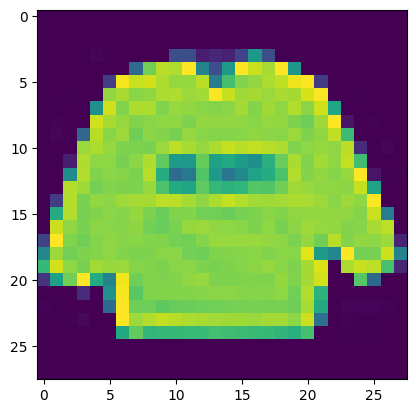

In [15]:
 plt.imshow(x_train[0])

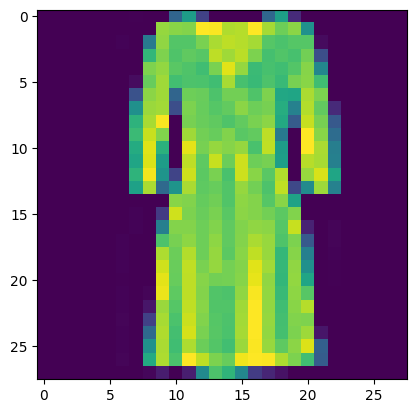

In [16]:
 plt.imshow(x_test[10])

In [17]:
x_train = x_train/255
x_test = x_test/255

In [19]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [20]:
 print("Train Shape :",x_train.shape)
 print("Test Shape :",x_test.shape)
 print("y_train shape :",y_train.shape)
 print("y_test shape :",y_test.shape)

Train Shape : (60000, 28, 28, 1)
Test Shape : (10000, 28, 28, 1)
y_train shape : (60000,)
y_test shape : (10000,)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [25]:
 model=Sequential()
 model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
 model.add(MaxPooling2D((2,2)))
 model.add(Conv2D(64, (3,3), activation='relu'))
 model.add(MaxPooling2D((2,2)))
 model.add(Flatten())
 model.add(Dense(128,activation='relu'))
 model.add(Dense(10,activation='softmax'))
 model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
 model.summary()

C:\Users\Pratik\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
 model.fit(x_train, y_train, epochs=3, verbose=1,validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.7826 - loss: 0.6053 - val_accuracy: 0.8777 - val_loss: 0.3324
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8871 - loss: 0.3097 - val_accuracy: 0.9025 - val_loss: 0.2670
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9078 - loss: 0.2515 - val_accuracy: 0.9075 - val_loss: 0.2453


In [27]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [28]:
 import numpy as np
 index=10
 print(predictions[index])
 final_value=np.argmax(predictions[index])
 print("Actual label :",y_test[index])
 print("Predicted label :",final_value)
 print("Class :",class_names[final_value])

[1.1088195e-04 1.2955533e-07 2.1486223e-05 9.9971563e-01 2.4677505e-05
 1.6514241e-08 1.2662621e-04 3.4642942e-09 5.3531170e-07 4.3526303e-09]
Actual label : 3
Predicted label : 3
Class : Dress


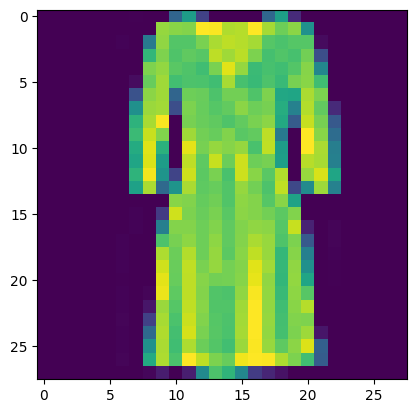

In [29]:
plt.imshow(x_test[10])

In [30]:
 loss, accuracy = model.evaluate(x_test, y_test)
 print("Loss :",loss)
 print("Accuracy (Test Data) :",accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9029 - loss: 0.2544
Loss : 0.24530915915966034
Accuracy (Test Data) : 90.75000286102295
